In [14]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile

from qiskit_aer import AerSimulator

In [5]:
simulator_basic = BasicSimulator()
simulator_aer = AerSimulator()

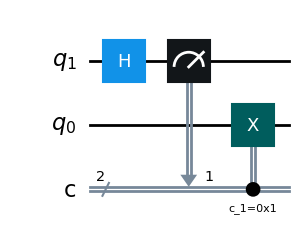

In [9]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.draw()

- Half of the time: $|0\rangle \otimes | 0 \rangle$
- Half of the time: $|1\rangle \otimes \frac{1}{\sqrt{2}}( |0\rangle + | 1 \rangle  )$

In [10]:
 psi = Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

Save Statevector

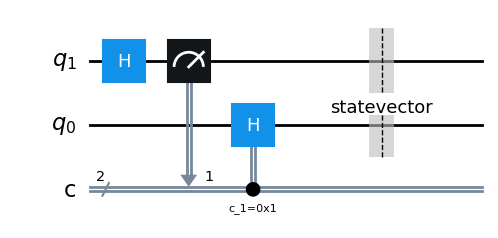

In [41]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.h(0).c_if(1,1)
qc.save_statevector()
qc.draw()

In [33]:
qc_basic = transpile(qc, backend=simulator_basic)

result = simulator_basic.run(qc_basic).result()
psi = result.get_statevector()
print(psi)

TranspilerError: "Unable to translate the operations in the circuit: ['measure', 'h', 'save_statevector'] to the backend's (or manually specified) target basis: ['cu3', 'snapshot', 'rxx', 'rzz', 'y', 'iswap', 'u3', 'ccx', 'u', 'crx', 'csdg', 'dcx', 'cz', 'cp', 'r', 'cu1', 'xx_plus_yy', 'unitary', 'ry', 'cy', 'cry', 'id', 'p', 'rx', 'sdg', 'swap', 'xx_minus_yy', 'cu', 'cs', 'h', 'rzx', 'ryy', 'ccz', 'reset', 't', 'store', 'csx', 'barrier', 'measure', 'ch', 'rz', 'global_phase', 'z', 'sxdg', 'u2', 'ecr', 'rccx', 'cswap', 'crz', 'delay', 'u1', 'x', 'tdg', 's', 'sx', 'cx']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum.ibm.com/api/qiskit/transpiler_passes.BasisTranslator#translation-errors"

In [45]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
psi = result.get_statevector()
psi

<IPython.core.display.Latex object>

Larger circuit

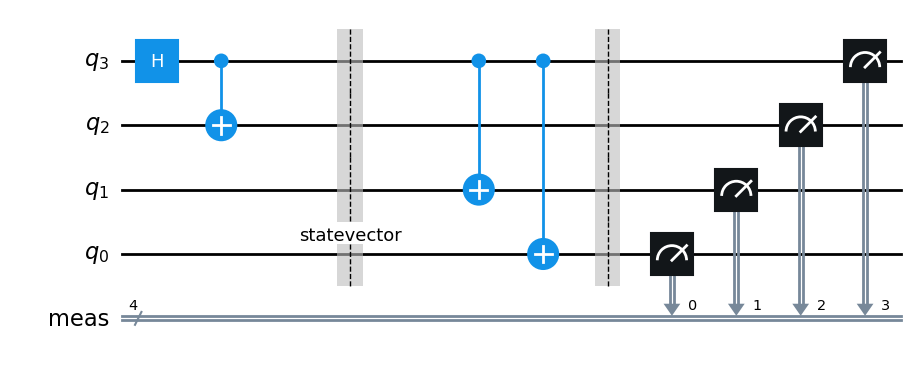

In [47]:
qc = QuantumCircuit(4)
qc.h(3)
qc.cx(3,2)
qc.save_statevector()
qc.cx(3,1)
qc.cx(3,0)
qc.measure_all()
qc.draw()

In [48]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
psi = result.get_statevector()
psi

<IPython.core.display.Latex object>

### Efficient Simulator

#### Comparison Basic and Aer Simulator with 5 qubit

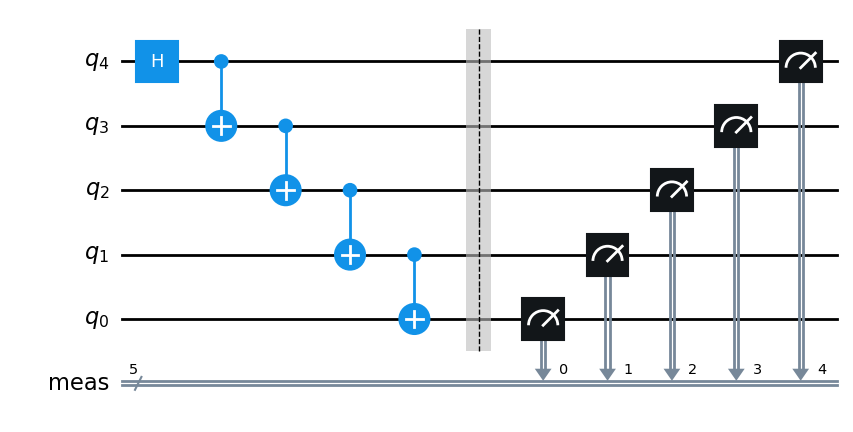

In [50]:
n = 5
qc = QuantumCircuit(n)
qc.h(n-1)

for i in range(n-1, 0, -1):
    qc.cx(i, i-1)

qc.measure_all()
qc.draw()

In [51]:
%%time

result = simulator_basic.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

{'00000': 509, '11111': 515}
CPU times: user 6.56 ms, sys: 0 ns, total: 6.56 ms
Wall time: 6.15 ms


In [53]:
%%time

result = simulator_aer.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

{'00000': 537, '11111': 487}
CPU times: user 12.3 ms, sys: 620 μs, total: 12.9 ms
Wall time: 6 ms


#### Comparison Basic and Aer Simulator with 24 qubit

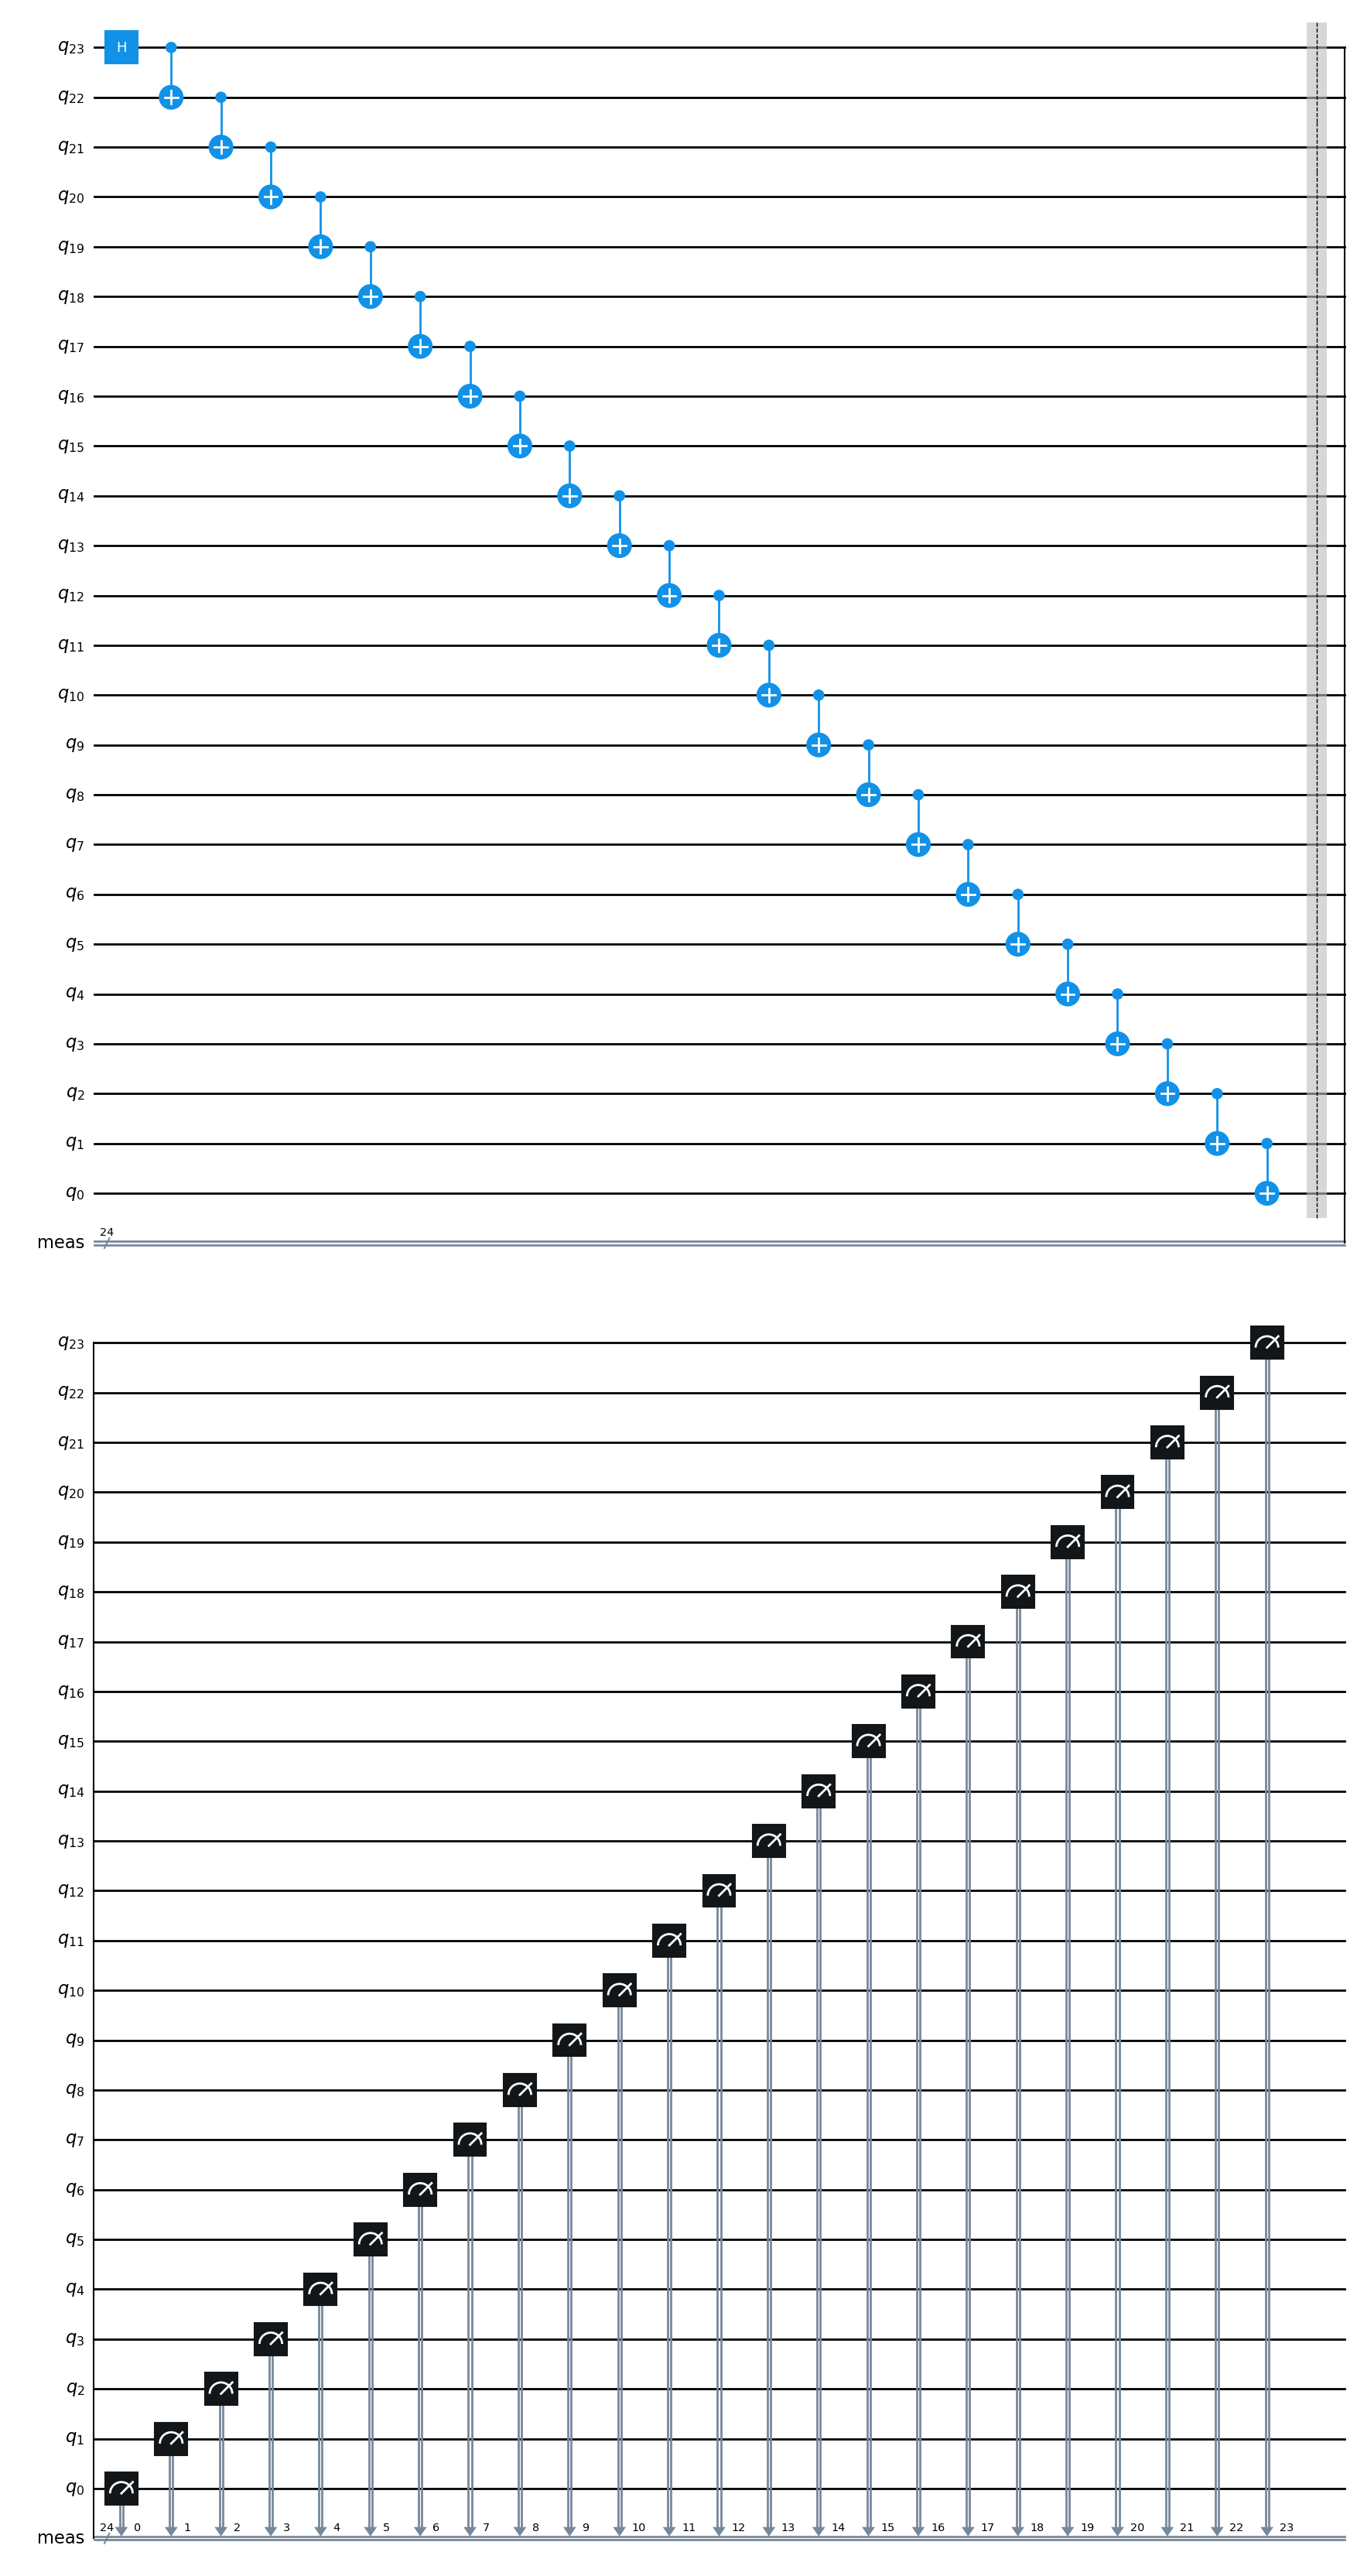

In [54]:
n = 24
qc = QuantumCircuit(n)
qc.h(n-1)

for i in range(n-1, 0, -1):
    qc.cx(i, i-1)

qc.measure_all()
qc.draw()

In [55]:
%%time

result = simulator_basic.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

{'111111111111111111111111': 521, '000000000000000000000000': 503}
CPU times: user 10.2 s, sys: 1.85 s, total: 12.1 s
Wall time: 12.1 s


In [56]:
%%time

result = simulator_aer.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

{'000000000000000000000000': 529, '111111111111111111111111': 495}
CPU times: user 134 ms, sys: 18.3 ms, total: 152 ms
Wall time: 22.1 ms


#### Comparison Between Aer Simulator Method (n = 50)

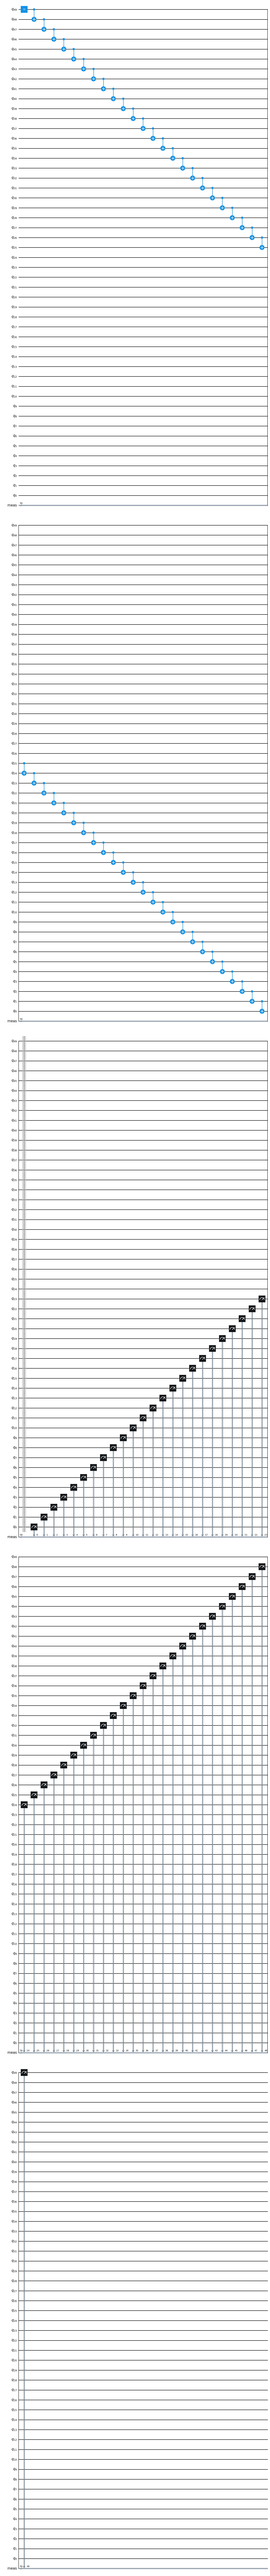

In [59]:
n = 50
qc = QuantumCircuit(n)
qc.h(n-1)

for i in range(n-1, 0, -1):
    qc.cx(i, i-1)

qc.measure_all()
qc.draw()

In [60]:
%%time

result = simulator_aer.run(qc, shots=1024, method='statevector').result()
counts = result.get_counts()
print(counts)

QiskitError: 'ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-210 using the statevector simulator. Required memory: 17179869184M, max memory: 7640M ,  ERROR: Insufficient memory to run circuit circuit-210 using the statevector simulator. Required memory: 17179869184M, max memory: 7640M'

In [61]:
%%time

result = simulator_aer.run(qc, shots=1024, method='matrix_product_state').result()
counts = result.get_counts()
print(counts)

{'00000000000000000000000000000000000000000000000000': 489, '11111111111111111111111111111111111111111111111111': 535}
CPU times: user 557 ms, sys: 476 ms, total: 1.03 s
Wall time: 90.6 ms


#### Comparison Noise

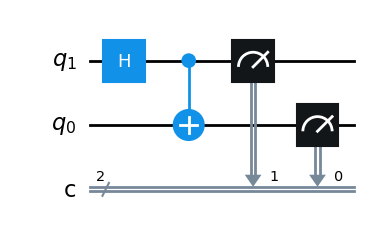

In [62]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.cx(1,0)
qc.measure([1,0],[1,0])
qc.draw()

In [64]:
qc_aer = transpile(qc, backend=simulator_aer)
result_ideal = simulator_aer.run(qc_aer, shots=1024).result()
counts_ideal = result_ideal.get_counts()

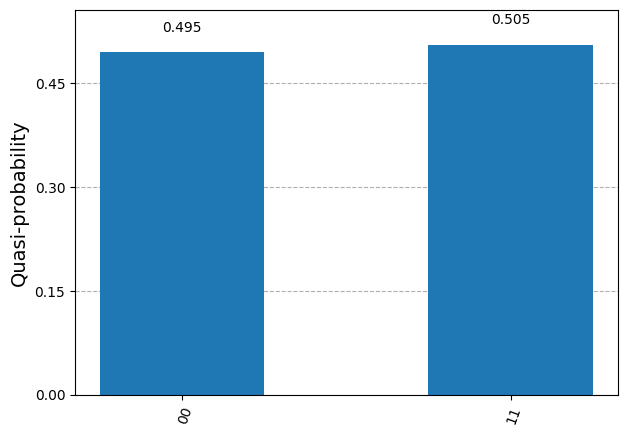

In [65]:
from qiskit.visualization import plot_distribution
plot_distribution(counts_ideal)

In [66]:
from qiskit_aer import noise

In [68]:
prob = 0.1
error = noise.depolarizing_error(prob, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['cx'])
basis_gates = noise_model.basis_gates

result_noisy = simulator_aer.run(qc,
                                 shots=1024,
                                 noise_model=noise_model,
                                 basis_gates=basis_gates
                                 ).result()
counts_noisy = result_noisy.get_counts()

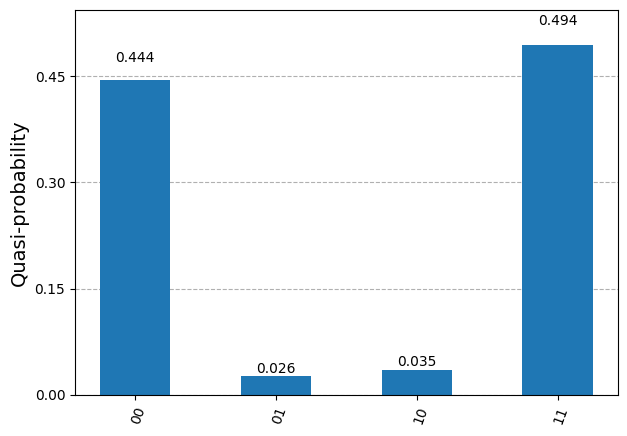

In [69]:
plot_distribution(counts_noisy)

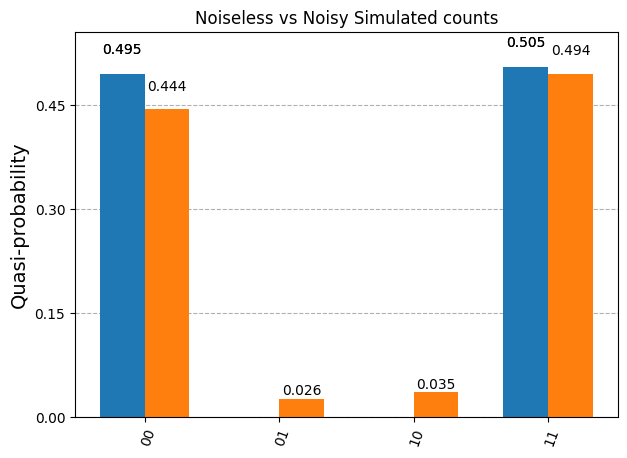

In [70]:
plot_distribution([counts_ideal, counts_noisy], title='Noiseless vs Noisy Simulated counts')